In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
import datetime as dt
from sklearn.metrics import precision_recall_fscore_support
warnings.filterwarnings("ignore")
url='http://www.preqveca.ru/placements/?sf%5Bipo_t%5D=&sf%5Bipo%5D=0&sf%5Bstatus%5D=0&sf%5Bcountr%5D=0&sf%5Bspec%5D=0&sf%5Blisting%5D=0&sf%5Bpsf%5D=&sf%5Bpst%5D=&sf%5Bpt%5D=0&sf%5Bind%5D=0&sf%5Bpef%5D=&sf%5Bpet%5D=&rec_start=30&rec_start=0'
respone = requests.get(url, verify=False)
result=pd.read_html(url)[2]

for i in range(12):
    url = 'http://www.preqveca.ru/placements/?sf%5Bipo_t%5D=&sf%5Bipo%5D=0&sf%5Bstatus%5D=0&sf%5Bcountr%5D=0&sf%5Bspec%5D=0&sf%5Blisting%5D=0&sf%5Bpsf%5D=&sf%5Bpst%5D=&sf%5Bpt%5D=0&sf%5Bind%5D=0&sf%5Bpef%5D=&sf%5Bpet%5D=&rec_start=30&rec_start=0' + '&rec_start='+str(30*(i+1))
    response = requests.get(url, verify=False)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = pd.read_html(url)[2]
    result = pd.concat([result, tables], ignore_index=True)
result
#Тут мы запарсили основную табличку с данными с 13 страниц сайта

,Название IPO / SPO,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения
0,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2,25.04.2023
1,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33,14.12.2022
2,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330,02.12.2022
3,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17,28.09.2022
4,Emerging Markets Horizon Corp.,"Технологии, телекоммуникации и медиа, Финансов...",NASDAQ,250,09.12.2021
...,...,...,...,...,...
367,Kaspi.kz (SPO),NaN,London Stock Exchange,366,15.03.2021
368,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaN
369,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaN
370,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9,NaN


In [7]:
for i in range(len(result['Дата окончания размещения'])):
    if pd.Series(result['Дата окончания размещения'].iloc[i], dtype=str).str.contains(' 20' or ' 19')[0]==True:
        print (result.iloc[i])
#Оказалось, что не все даты записаны в одинаковом формате. Здесь мы ищем эти даты

Название IPO / SPO                            ViOil Holding S.A.
Отрасль                                 Сельское хозяйство и АПК
Биржа размещения                           Warsaw Stock Exchange
Объем привлеченных средств, млн. USD                         150
Дата окончания размещения                               Июл 2011
Name: 120, dtype: object
Название IPO / SPO                          Пробизнесбанк
Отрасль                                 Финансовые услуги
Биржа размещения                                      NaN
Объем привлеченных средств, млн. USD                  NaN
Дата окончания размещения                        Авг 2011
Name: 125, dtype: object
Название IPO / SPO                            Теплофон
Отрасль                                 Другие отрасли
Биржа размещения                                  ММВБ
Объем привлеченных средств, млн. USD                 3
Дата окончания размещения                     Июн 2011
Name: 126, dtype: object
Название IPO / SPO                 

In [8]:
new=result
new['Дата окончания размещения'].iloc[120]='30.07.2011'
new['Дата окончания размещения'].iloc[125]='30.08.2011'
new['Дата окончания размещения'].iloc[126]='30.06.2011'
new['Дата окончания размещения'].iloc[127]='30.06.2011'
new['Дата окончания размещения'] = pd.to_datetime(result['Дата окончания размещения'], format='%d.%m.%Y')
new.sort_values('Дата окончания размещения',ignore_index=True)
#Перевели все даты в формат datetime и отсортировали по ни таблицу

,Название IPO / SPO,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения
0,JKX Oil & Gas,Нефть и газ,London Stock Exchange,NaN,1995-06-18
1,Everfor Diamonds,"Добыча золота, алмазов и драгоценных камней",LSE's AIM,NaN,1996-04-06
2,Eurasia Mining,"Металлургия и горное дело, Нефть и газ",LSE's AIM,NaN,1996-10-02
3,Газпром,Нефть и газ,London Stock Exchange,429.0,1996-10-28
4,Вымпелком,"Технологии, телекоммуникации и медиа",NYSE,111.0,1996-11-13
...,...,...,...,...,...
367,Высочайший (GV Gold),Металлургия и горное дело,"London Stock Exchange, ММВБ",500,NaT
368,Цифра,"Металлургия и горное дело, Технологии, телеком...",ММВБ,NaN,NaT
369,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaT
370,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaT


In [9]:
url2 = 'http://www.preqveca.ru/placements/570/'
df=pd.read_html(url2)[1]
df = df.T
df = df.rename(columns=df.iloc[0])
df = df.drop(0, axis = 0)

import io
from urllib.request import urlopen

for i in range(13):
    url = 'http://www.preqveca.ru/placements/?sf%5Bipo_t%5D=&sf%5Bipo%5D=0&sf%5Bstatus%5D=0&sf%5Bcountr%5D=0&sf%5Bspec%5D=0&sf%5Blisting%5D=0&sf%5Bpsf%5D=&sf%5Bpst%5D=&sf%5Bpt%5D=0&sf%5Bind%5D=0&sf%5Bpef%5D=&sf%5Bpet%5D=&rec_start=30&rec_start=0' + '&rec_start='+str(30*(i))

    pages_to_parse=[url]
    parsed_pages=[]
    site_links=[]

    while pages_to_parse != []:
        current_page = pages_to_parse.pop()
        html_doc = urlopen(url).read()
        soup = BeautifulSoup(html_doc, 'html.parser')
        # ищем div с нужным классом
        collect = soup.find('table', {'class': 'datagrid'})
        # в найденном div'е, ищем все ссылки (т.е. теги a).
        a_tags_on_page = collect.findAll('a') 
        links_on_page = []
        for link in a_tags_on_page:
            links_on_page.append(str(link.get('href')))
    links_on_page

    for j in range(1, len(links_on_page)):
        url3 = 'http://www.preqveca.ru' + links_on_page[j]
        df1=pd.read_html(url3)[1]
        df1 = df1.T
        df1 = df1.rename(columns=df1.iloc[0])
        df1 = df1.drop(0, axis = 0)
        df = pd.concat([df, df1],ignore_index=True)

df


,Название,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Окончание,Количество размещённых ц.б.,"Объем привлеченных средств, млн. USD","Цена размещения, USD",Биржа размещения,Инвестиционные банки,Страна операций,Отрасль,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Проспект эмиссии,Рост/Падение с даты размещения,Offering Memorandum
0,Genetico,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,25.04.2023,10 000 000,2,0.22,ММВБ,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,Биотехнологии и медико-биологические исследова...,NaN,NaN,NaN,NaN,NaN,NaN
1,Whoosh,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,14.12.2022,NaN,33,2.92,ММВБ,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия","Технологии, телекоммуникации и медиа, Транспор...",3.56,2.92,326,скачать8163Кб,NaN,NaN
2,КазМунайГаз,акция обыкновенная,IPO,Открытый,23.11.2022,Завершено,02.12.2022,18 296 455,330,17.78,"Astana International Exchange (AIX), KASE",Freedom Finance,Казахстан,Нефть и газ,NaN,NaN,11 000,NaN,NaN,NaN
3,Positive Technologies (SPO),акция обыкновенная,SPO,Открытый,19.09.2022,Завершено,28.09.2022,932 600,17,18.25,ММВБ,БКС-банк,Россия,"Технологии, телекоммуникации и медиа",22.00,20.00,1 234,NaN,18.64%,NaN
4,Emerging Markets Horizon Corp.,ADR,IPO,Открытый,09.12.2021,Завершено,09.12.2021,25 000 000,250,10.00,NASDAQ,"Citigroup, ВТБ Капитал","Глобальный рынок, Россия, США","Технологии, телекоммуникации и медиа, Финансов...",NaN,NaN,NaN,скачать3945Кб,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Kaspi.kz (SPO),GDR,SPO,Открытый,NaN,Завершено,15.03.2021,6 000 000,366,61.00,London Stock Exchange,"Citigroup, Morgan Stanley",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,Европлан (IPO-II),акция обыкновенная,IPO,Открытый,NaN,Планируемый,NaN,NaN,NaN,NaN,ММВБ,NaN,NaN,"Транспорт и логистика, Финансовые услуги",NaN,NaN,NaN,NaN,NaN,NaN
357,Mercury Retail Group (MRG),GDR,IPO,Открытый,NaN,Отложено,NaN,200 000 000,1 300,NaN,ММВБ,"Bank of America, JP Morgan, ВТБ Капитал, Газпр...",Россия,"FMCG, Торговля и потребительский сектор",6.50,6.00,13 000,NaN,NaN,NaN
358,Алмазы Арктики (АЛМАР),акция обыкновенная,IPO,Открытый,NaN,Планируемый,NaN,21 805,9,NaN,Санкт-Петербургская биржа,"ITI Capital, ИФК Солид",Россия,Металлургия и горное дело,NaN,NaN,NaN,скачать9592Кб,NaN,NaN


In [10]:
print(set(new['Название IPO / SPO'].unique())-set(df['Название'].unique()))
print()
print(set(df['Название'].unique())-set(new['Название IPO / SPO'].unique()))

{'ФосАгро SPO', 'Транс Сибирь', 'ВТБ', 'Русснефть', 'Иждрил холдинг', 'Магнит', 'Kryso Resources', 'Синергия', 'ViOil Holding S.A.', 'Alliance Oil (IPO)', 'Mail.ru Group (SPO-3)', 'РУСАЛ'}

set()


In [11]:
allin=df
helpme=[405 , 78, 103, 287, 214, 475, 3, 387, 112, 347, 136, 56]
for i in helpme:
    url2 = 'http://www.preqveca.ru/placements/' + str(i)
    tables =pd.read_html(url2, index_col=0)[1].T
    allin = pd.concat([allin, tables], ignore_index=True)
allin

,Название,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Окончание,Количество размещённых ц.б.,"Объем привлеченных средств, млн. USD","Цена размещения, USD",Биржа размещения,Инвестиционные банки,Страна операций,Отрасль,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Проспект эмиссии,Рост/Падение с даты размещения,Offering Memorandum
0,Genetico,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,25.04.2023,10 000 000,2,0.22,ММВБ,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,Биотехнологии и медико-биологические исследова...,NaN,NaN,NaN,NaN,NaN,NaN
1,Whoosh,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,14.12.2022,NaN,33,2.92,ММВБ,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия","Технологии, телекоммуникации и медиа, Транспор...",3.56,2.92,326,скачать8163Кб,NaN,NaN
2,КазМунайГаз,акция обыкновенная,IPO,Открытый,23.11.2022,Завершено,02.12.2022,18 296 455,330,17.78,"Astana International Exchange (AIX), KASE",Freedom Finance,Казахстан,Нефть и газ,NaN,NaN,11 000,NaN,NaN,NaN
3,Positive Technologies (SPO),акция обыкновенная,SPO,Открытый,19.09.2022,Завершено,28.09.2022,932 600,17,18.25,ММВБ,БКС-банк,Россия,"Технологии, телекоммуникации и медиа",22.00,20.00,1 234,NaN,18.64%,NaN
4,Emerging Markets Horizon Corp.,ADR,IPO,Открытый,09.12.2021,Завершено,09.12.2021,25 000 000,250,10.00,NASDAQ,"Citigroup, ВТБ Капитал","Глобальный рынок, Россия, США","Технологии, телекоммуникации и медиа, Финансов...",NaN,NaN,NaN,скачать3945Кб,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Alliance Oil (IPO),GDR,IPO,Открытый,NaN,Завершено,12.07.2009,NaN,390,11.16,London Stock Exchange,"Merrill Lynch, Morgan Stanley, ВТБ Капитал, Тр...",Россия,Нефть и газ,11.16,11.16,1 940,NaN,NaN,NaN
368,Транс Сибирь,акция обыкновенная,IPO,Открытый,20.11.2003,Завершено,25.11.2003,10 666 667,27,2.55,LSE's AIM,Collins Stewart,Россия,"Добыча золота, алмазов и драгоценных камней",NaN,NaN,73,NaN,NaN,скачать2654Кб
369,ФосАгро SPO,"GDR, акция обыкновенная",SPO,Открытый,08.04.2013,Завершено,09.04.2013,11,470,42.00,"London Stock Exchange, ММВБ","Citigroup, Merrill Lynch, Raiffeisenbank, ВТБ ...",Россия,Химия и нефтехимия,NaN,NaN,NaN,NaN,NaN,NaN
370,Синергия,акция обыкновенная,IPO,Открытый,04.11.2007,Завершено,15.11.2007,2 720 000,190,70.00,"ММВБ, РТС","МДМ-Банк, Ренессанс Капитал",Россия,Пищевая,72.00,61.00,NaN,NaN,-77.86%,NaN


In [12]:
print(set(new['Название IPO / SPO'].unique())-set(allin['Название'].unique()))
print()
print(set(allin['Название'].unique())-set(new['Название IPO / SPO'].unique()))

set()

set()


In [14]:
rex=allin.drop(['Окончание','Объем привлеченных средств, млн. USD','Биржа размещения','Отрасль','Проспект эмиссии','Offering Memorandum'],axis=1)
rex

,Название,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,0.22,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN,NaN
1,Whoosh,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326,NaN
2,КазМунайГаз,акция обыкновенная,IPO,Открытый,23.11.2022,Завершено,18 296 455,17.78,Freedom Finance,Казахстан,NaN,NaN,11 000,NaN
3,Positive Technologies (SPO),акция обыкновенная,SPO,Открытый,19.09.2022,Завершено,932 600,18.25,БКС-банк,Россия,22.00,20.00,1 234,18.64%
4,Emerging Markets Horizon Corp.,ADR,IPO,Открытый,09.12.2021,Завершено,25 000 000,10.00,"Citigroup, ВТБ Капитал","Глобальный рынок, Россия, США",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Alliance Oil (IPO),GDR,IPO,Открытый,NaN,Завершено,NaN,11.16,"Merrill Lynch, Morgan Stanley, ВТБ Капитал, Тр...",Россия,11.16,11.16,1 940,NaN
368,Транс Сибирь,акция обыкновенная,IPO,Открытый,20.11.2003,Завершено,10 666 667,2.55,Collins Stewart,Россия,NaN,NaN,73,NaN
369,ФосАгро SPO,"GDR, акция обыкновенная",SPO,Открытый,08.04.2013,Завершено,11,42.00,"Citigroup, Merrill Lynch, Raiffeisenbank, ВТБ ...",Россия,NaN,NaN,NaN,NaN
370,Синергия,акция обыкновенная,IPO,Открытый,04.11.2007,Завершено,2 720 000,70.00,"МДМ-Банк, Ренессанс Капитал",Россия,72.00,61.00,NaN,-77.86%


In [124]:
new.rename(columns = {'Название IPO / SPO':'Название'}, inplace=True )
fin=new.merge(rex, on='Название', how='left')
final=fin.loc[fin['Название'].duplicated(keep = 'first')==False]
final.reset_index(drop= True,inplace= True )
final

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2,2023-04-25,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,0.22,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN,NaN
1,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326,NaN
2,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330,2022-12-02,акция обыкновенная,IPO,Открытый,23.11.2022,Завершено,18 296 455,17.78,Freedom Finance,Казахстан,NaN,NaN,11 000,NaN
3,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17,2022-09-28,акция обыкновенная,SPO,Открытый,19.09.2022,Завершено,932 600,18.25,БКС-банк,Россия,22.00,20.00,1 234,18.64%
4,Emerging Markets Horizon Corp.,"Технологии, телекоммуникации и медиа, Финансов...",NASDAQ,250,2021-12-09,ADR,IPO,Открытый,09.12.2021,Завершено,25 000 000,10.00,"Citigroup, ВТБ Капитал","Глобальный рынок, Россия, США",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Kaspi.kz (SPO),NaN,London Stock Exchange,366,2021-03-15,GDR,SPO,Открытый,NaN,Завершено,6 000 000,61.00,"Citigroup, Morgan Stanley",NaN,NaN,NaN,NaN,NaN
367,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaT,GDR,IPO,Открытый,NaN,Отложено,200 000 000,NaN,"Bank of America, JP Morgan, ВТБ Капитал, Газпр...",Россия,6.50,6.00,13 000,NaN
369,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,21 805,NaN,"ITI Capital, ИФК Солид",Россия,NaN,NaN,NaN,NaN


In [125]:
for i in range(len(final['Начало'])):
    if pd.Series(final['Начало'].iloc[i], dtype=str).str.contains(' 20' or ' 19')[0]==True:
        print (final.iloc[i])

Название                                                ВТБ (SPO)-3
Отрасль                                           Финансовые услуги
Биржа размещения                                               ММВБ
Объем привлеченных средств, млн. USD                          3 275
Дата окончания размещения                       2013-05-22 00:00:00
Спецификация размещения                          акция обыкновенная
Тип размещения                                                  SPO
Тип подписки                                               Открытый
Начало                                                     Май 2013
Статус                                                    Завершено
Количество размещённых ц.б.                       2 500 000 000 000
Цена размещения, USD                                           0.00
Инвестиционные банки                                            NaN
Страна операций                                              Россия
Ценовой коридор, верхняя граница, USD           

In [17]:
for i in range(len(final['Начало'])):
    if pd.Series(final['Начало'].iloc[i], dtype=str).str.contains('.20' or '.19')[0]==False:
        print (final.iloc[i])

Название                                                         ИНТЕРГЕО
Отрасль                                         Металлургия и горное дело
Биржа размещения                                   Toronto Stock Exchange
Объем привлеченных средств, млн. USD                                  155
Дата окончания размещения                                             NaT
Спецификация размещения                                               NaN
Тип размещения                                                        IPO
Тип подписки                                                     Открытый
Начало                                                               2013
Статус                                                           Отложено
Количество размещённых ц.б.                                           NaN
Цена размещения, USD                                                  NaN
Инвестиционные банки                                       Morgan Stanley
Страна операций                       

In [126]:
final['Начало'].iloc[89]='01.05.2013'
final['Начало'].iloc[99]='01.11.2012'
final['Начало'].iloc[114]='01.10.2011'
final['Начало'].iloc[124]='01.06.2011'
final['Начало'].iloc[125]='01.06.2011'
final['Начало'].iloc[126]='01.06.2011'
final['Начало'].iloc[127]='01.06.2011'
final['Начало'].iloc[169]='01.09.2010'
final['Начало'].iloc[94]='01.01.2013'
final['Начало'].iloc[95]='01.01.2013'
final['Начало'].iloc[154]='01.01.2011'
final['Начало'].iloc[169]='01.09.2010'
final['Начало'].iloc[153]='01.01.2011'
final['Начало'].iloc[152]='01.01.2011'
final['Начало'].iloc[151]='01.01.2011'
final['Начало'].iloc[150]='01.01.2011'
final['Начало'].iloc[111]='01.01.2012'
final['Начало'] = pd.to_datetime(final['Начало'], format='%d.%m.%Y')
final['Отрасль'].fillna('Другие отрасли', inplace=True)
final['Биржа размещения'].isnull()
final

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,NaN,NaN
1,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326,NaN
2,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,18 296 455,17.78,Freedom Finance,Казахстан,NaN,NaN,11 000,NaN
3,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17,2022-09-28,акция обыкновенная,SPO,Открытый,2022-09-19,Завершено,932 600,18.25,БКС-банк,Россия,22.00,20.00,1 234,18.64%
4,Emerging Markets Horizon Corp.,"Технологии, телекоммуникации и медиа, Финансов...",NASDAQ,250,2021-12-09,ADR,IPO,Открытый,2021-12-09,Завершено,25 000 000,10.00,"Citigroup, ВТБ Капитал","Глобальный рынок, Россия, США",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Kaspi.kz (SPO),Другие отрасли,London Stock Exchange,366,2021-03-15,GDR,SPO,Открытый,NaT,Завершено,6 000 000,61.00,"Citigroup, Morgan Stanley",NaN,NaN,NaN,NaN,NaN
367,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,NaN,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,NaN,"Bank of America, JP Morgan, ВТБ Капитал, Газпр...",Россия,6.50,6.00,13 000,NaN
369,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,NaN,"ITI Capital, ИФК Солид",Россия,NaN,NaN,NaN,NaN


In [128]:
s=[]
final1=final
for i in range(len(final1['Объем привлеченных средств, млн. USD'])):
    s.append(str(final1['Объем привлеченных средств, млн. USD'][i]))

for i in range (len(s)):
    s[i]=s[i].replace(' ','')
    s[i]=s[i].replace('.0','')
    if s[i]!='nan':
        s[i]=int(s[i])
    if s[i]=='nan':
        s[i]=0
final1['Объем привлеченных средств, млн. USD']=s
b=[]

for i in range(len(final1['Количество размещённых ц.б.'])):
    b.append(str(final1['Количество размещённых ц.б.'][i]))

for i in range (len(b)):
    b[i]=b[i].replace(' ','')
    b[i]=b[i].replace('.0','')
    if b[i]!='nan':
        b[i]=int(b[i])
    if b[i]=='nan':
        b[i]=0
final1['Количество размещённых ц.б.']=b
a=[]

for i in range(len(final1['Капитализация на момент размещения, млн. USD'])):
    a.append(str(final1['Капитализация на момент размещения, млн. USD'][i]))

for i in range (len(a)):
    a[i]=a[i].replace(' ','')
    a[i]=a[i].replace('.0','')
    if a[i]!='nan':
        a[i]=int(a[i])
    if a[i]=='nan':
        a[i]=0
final1['Капитализация на момент размещения, млн. USD']=a
final1

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,Биотехнологии и медико-биологические исследова...,ММВБ,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10000000,0.22,"АЛОР ИНВЕСТ, ИВА Партнерс",Россия,NaN,NaN,0,NaN
1,Whoosh,"Технологии, телекоммуникации и медиа, Транспор...",ММВБ,33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,0,2.92,"Сбербанк, Тинькофф банк","Беларусь, Казахстан, Россия",3.56,2.92,326,NaN
2,КазМунайГаз,Нефть и газ,"Astana International Exchange (AIX), KASE",330,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,18296455,17.78,Freedom Finance,Казахстан,NaN,NaN,11000,NaN
3,Positive Technologies (SPO),"Технологии, телекоммуникации и медиа",ММВБ,17,2022-09-28,акция обыкновенная,SPO,Открытый,2022-09-19,Завершено,932600,18.25,БКС-банк,Россия,22.00,20.00,1234,18.64%
4,Emerging Markets Horizon Corp.,"Технологии, телекоммуникации и медиа, Финансов...",NASDAQ,250,2021-12-09,ADR,IPO,Открытый,2021-12-09,Завершено,25000000,10.00,"Citigroup, ВТБ Капитал","Глобальный рынок, Россия, США",NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Kaspi.kz (SPO),Другие отрасли,London Stock Exchange,366,2021-03-15,GDR,SPO,Открытый,NaT,Завершено,6000000,61.00,"Citigroup, Morgan Stanley",NaN,NaN,NaN,0,NaN
367,Европлан (IPO-II),"Транспорт и логистика, Финансовые услуги",ММВБ,0,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,0,NaN,NaN,NaN,NaN,NaN,0,NaN
368,Mercury Retail Group (MRG),"FMCG, Торговля и потребительский сектор",ММВБ,1300,NaT,GDR,IPO,Открытый,NaT,Отложено,200000000,NaN,"Bank of America, JP Morgan, ВТБ Капитал, Газпр...",Россия,6.50,6.00,13000,NaN
369,Алмазы Арктики (АЛМАР),Металлургия и горное дело,Санкт-Петербургская биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21805,NaN,"ITI Capital, ИФК Солид",Россия,NaN,NaN,0,NaN


In [101]:
masss=final1
for i in range (len(final['Отрасль'])):
    masss['Отрасль'][i] = str(masss['Отрасль'][i]).split(',')
    masss['Биржа размещения'][i] = str(masss['Биржа размещения'][i]).split(',')
    masss['Инвестиционные банки'][i] = str(masss['Инвестиционные банки'][i]).split(',')
    masss['Страна операций'][i] = str(masss['Страна операций'][i]).split(',')
masss

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,[Биотехнологии и медико-биологические исследов...,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,0.22,"[АЛОР ИНВЕСТ, ИВА Партнерс]",[Россия],NaN,NaN,NaN,NaN
1,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
2,КазМунайГаз,[Нефть и газ],"[Astana International Exchange (AIX), KASE]",330,2022-12-02,акция обыкновенная,IPO,Открытый,23.11.2022,Завершено,18 296 455,17.78,[Freedom Finance],[Казахстан],NaN,NaN,11 000,NaN
3,Positive Technologies (SPO),"[Технологии, телекоммуникации и медиа]",[ММВБ],17,2022-09-28,акция обыкновенная,SPO,Открытый,19.09.2022,Завершено,932 600,18.25,[БКС-банк],[Россия],22.00,20.00,1 234,18.64%
4,Emerging Markets Horizon Corp.,"[Технологии, телекоммуникации и медиа, Финан...",[NASDAQ],250,2021-12-09,ADR,IPO,Открытый,09.12.2021,Завершено,25 000 000,10.00,"[Citigroup, ВТБ Капитал]","[Глобальный рынок, Россия, США]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Kaspi.kz (SPO),[nan],[London Stock Exchange],366,2021-03-15,GDR,SPO,Открытый,NaN,Завершено,6 000 000,61.00,"[Citigroup, Morgan Stanley]",[nan],NaN,NaN,NaN,NaN
367,Европлан (IPO-II),"[Транспорт и логистика, Финансовые услуги]",[ММВБ],0,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,NaN,NaN,[nan],[nan],NaN,NaN,NaN,NaN
368,Mercury Retail Group (MRG),"[FMCG, Торговля и потребительский сектор]",[ММВБ],1300,NaT,GDR,IPO,Открытый,NaN,Отложено,200 000 000,NaN,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",[Россия],6.50,6.00,13 000,NaN
369,Алмазы Арктики (АЛМАР),[Металлургия и горное дело],[Санкт-Петербургская биржа],9,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,21 805,NaN,"[ITI Capital, ИФК Солид]",[Россия],NaN,NaN,NaN,NaN


In [102]:
otr=masss.explode("Отрасль",ignore_index = True)
otr

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,Биотехнологии и медико-биологические исследования,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,0.22,"[АЛОР ИНВЕСТ, ИВА Партнерс]",[Россия],NaN,NaN,NaN,NaN
1,Genetico,Медицинские услуги,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,0.22,"[АЛОР ИНВЕСТ, ИВА Партнерс]",[Россия],NaN,NaN,NaN,NaN
2,Whoosh,Технологии,[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
3,Whoosh,телекоммуникации и медиа,[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
4,Whoosh,Транспорт и логистика,[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Европлан (IPO-II),Финансовые услуги,[ММВБ],0,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,NaN,NaN,[nan],[nan],NaN,NaN,NaN,NaN
464,Mercury Retail Group (MRG),FMCG,[ММВБ],1300,NaT,GDR,IPO,Открытый,NaN,Отложено,200 000 000,NaN,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",[Россия],6.50,6.00,13 000,NaN
465,Mercury Retail Group (MRG),Торговля и потребительский сектор,[ММВБ],1300,NaT,GDR,IPO,Открытый,NaN,Отложено,200 000 000,NaN,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",[Россия],6.50,6.00,13 000,NaN
466,Алмазы Арктики (АЛМАР),Металлургия и горное дело,[Санкт-Петербургская биржа],9,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,21 805,NaN,"[ITI Capital, ИФК Солид]",[Россия],NaN,NaN,NaN,NaN


In [103]:
for i in range(len(otr['Отрасль'])):
    otr['Отрасль'][i]=otr['Отрасль'][i].title()
otr

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,Биотехнологии И Медико-Биологические Исследования,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,0.22,"[АЛОР ИНВЕСТ, ИВА Партнерс]",[Россия],NaN,NaN,NaN,NaN
1,Genetico,Медицинские Услуги,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,12.04.2023,Завершено,10 000 000,0.22,"[АЛОР ИНВЕСТ, ИВА Партнерс]",[Россия],NaN,NaN,NaN,NaN
2,Whoosh,Технологии,[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
3,Whoosh,Телекоммуникации И Медиа,[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
4,Whoosh,Транспорт И Логистика,[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,05.12.2022,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Европлан (IPO-II),Финансовые Услуги,[ММВБ],0,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,NaN,NaN,[nan],[nan],NaN,NaN,NaN,NaN
464,Mercury Retail Group (MRG),Fmcg,[ММВБ],1300,NaT,GDR,IPO,Открытый,NaN,Отложено,200 000 000,NaN,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",[Россия],6.50,6.00,13 000,NaN
465,Mercury Retail Group (MRG),Торговля И Потребительский Сектор,[ММВБ],1300,NaT,GDR,IPO,Открытый,NaN,Отложено,200 000 000,NaN,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",[Россия],6.50,6.00,13 000,NaN
466,Алмазы Арктики (АЛМАР),Металлургия И Горное Дело,[Санкт-Петербургская биржа],9,NaT,акция обыкновенная,IPO,Открытый,NaN,Планируемый,21 805,NaN,"[ITI Capital, ИФК Солид]",[Россия],NaN,NaN,NaN,NaN


In [22]:
bir=masss.explode("Биржа размещения",ignore_index = True)
for i in range(len(bir['Биржа размещения'])):
    bir['Биржа размещения'][i]=bir['Биржа размещения'][i].title()
bir = bir.drop(bir[bir['Биржа размещения']=='Nan'].index)
bir

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,[Биотехнологии и медико-биологические исследов...,Ммвб,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,"[АЛОР ИНВЕСТ, ИВА Партнерс]",[Россия],NaN,NaN,NaN,NaN
1,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",Ммвб,33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]","[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
2,КазМунайГаз,[Нефть и газ],Astana International Exchange (Aix),330,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,18 296 455,17.78,[Freedom Finance],[Казахстан],NaN,NaN,11 000,NaN
3,КазМунайГаз,[Нефть и газ],Kase,330,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,18 296 455,17.78,[Freedom Finance],[Казахстан],NaN,NaN,11 000,NaN
4,Positive Technologies (SPO),"[Технологии, телекоммуникации и медиа]",Ммвб,17,2022-09-28,акция обыкновенная,SPO,Открытый,2022-09-19,Завершено,932 600,18.25,[БКС-банк],[Россия],22.00,20.00,1 234,18.64%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Kaspi.kz (SPO),[Другие отрасли],London Stock Exchange,366,2021-03-15,GDR,SPO,Открытый,NaT,Завершено,6 000 000,61.00,"[Citigroup, Morgan Stanley]",[nan],NaN,NaN,NaN,NaN
456,Европлан (IPO-II),"[Транспорт и логистика, Финансовые услуги]",Ммвб,NaN,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,NaN,NaN,[nan],[nan],NaN,NaN,NaN,NaN
457,Mercury Retail Group (MRG),"[FMCG, Торговля и потребительский сектор]",Ммвб,1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,NaN,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",[Россия],6.50,6.00,13 000,NaN
458,Алмазы Арктики (АЛМАР),[Металлургия и горное дело],Санкт-Петербургская Биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,NaN,"[ITI Capital, ИФК Солид]",[Россия],NaN,NaN,NaN,NaN


In [23]:
cou=masss.explode("Страна операций",ignore_index = True)
for i in range(len(cou['Страна операций'])):
    cou['Страна операций'][i]=cou['Страна операций'][i].title()
cou = cou.drop(cou[cou['Страна операций']=='Nan'].index)
cou

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,[Биотехнологии и медико-биологические исследов...,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,"[АЛОР ИНВЕСТ, ИВА Партнерс]",Россия,NaN,NaN,NaN,NaN
1,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]",Беларусь,3.56,2.92,326,NaN
2,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]",Казахстан,3.56,2.92,326,NaN
3,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,"[Сбербанк, Тинькофф банк]",Россия,3.56,2.92,326,NaN
4,КазМунайГаз,[Нефть и газ],"[Astana International Exchange (AIX), KASE]",330,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,18 296 455,17.78,[Freedom Finance],Казахстан,NaN,NaN,11 000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,ivi,"[Технологии, телекоммуникации и медиа]",[NASDAQ],NaN,NaT,ADR,IPO,Открытый,NaT,Планируемый,NaN,NaN,[nan],Россия,NaN,NaN,NaN,NaN
402,Высочайший (GV Gold),[Металлургия и горное дело],"[London Stock Exchange, ММВБ]",500,NaT,"GDR, акция обыкновенная",IPO,Открытый,NaT,Отложено,NaN,NaN,"[Goldman Sachs, UBS Investment Bank]",Россия,NaN,NaN,NaN,NaN
406,Mercury Retail Group (MRG),"[FMCG, Торговля и потребительский сектор]",[ММВБ],1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,NaN,"[Bank of America, JP Morgan, ВТБ Капитал, Г...",Россия,6.50,6.00,13 000,NaN
407,Алмазы Арктики (АЛМАР),[Металлургия и горное дело],[Санкт-Петербургская биржа],9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,NaN,"[ITI Capital, ИФК Солид]",Россия,NaN,NaN,NaN,NaN


In [24]:
inv=masss.explode("Инвестиционные банки",ignore_index = True)
for i in range(len(inv['Инвестиционные банки'])):
    inv['Инвестиционные банки'][i]=inv['Инвестиционные банки'][i].title()
inv = inv.drop(inv[inv['Инвестиционные банки']=='Nan'].index)
inv

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,[Биотехнологии и медико-биологические исследов...,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,Алор Инвест,[Россия],NaN,NaN,NaN,NaN
1,Genetico,[Биотехнологии и медико-биологические исследов...,[ММВБ],2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,Ива Партнерс,[Россия],NaN,NaN,NaN,NaN
2,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,Сбербанк,"[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
3,Whoosh,"[Технологии, телекоммуникации и медиа, Транс...",[ММВБ],33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,Тинькофф Банк,"[Беларусь, Казахстан, Россия]",3.56,2.92,326,NaN
4,КазМунайГаз,[Нефть и газ],"[Astana International Exchange (AIX), KASE]",330,2022-12-02,акция обыкновенная,IPO,Открытый,2022-11-23,Завершено,18 296 455,17.78,Freedom Finance,[Казахстан],NaN,NaN,11 000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Mercury Retail Group (MRG),"[FMCG, Торговля и потребительский сектор]",[ММВБ],1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,NaN,Ренессанс Капитал,[Россия],6.50,6.00,13 000,NaN
849,Mercury Retail Group (MRG),"[FMCG, Торговля и потребительский сектор]",[ММВБ],1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,NaN,Сбербанк,[Россия],6.50,6.00,13 000,NaN
850,Алмазы Арктики (АЛМАР),[Металлургия и горное дело],[Санкт-Петербургская биржа],9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,NaN,Iti Capital,[Россия],NaN,NaN,NaN,NaN
851,Алмазы Арктики (АЛМАР),[Металлургия и горное дело],[Санкт-Петербургская биржа],9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,NaN,Ифк Солид,[Россия],NaN,NaN,NaN,NaN


In [25]:
tall=masss.explode("Страна операций",ignore_index = True)
for i in range(len(tall['Страна операций'])):
    tall['Страна операций'][i]=tall['Страна операций'][i].title()
tall=tall.explode("Инвестиционные банки",ignore_index = True)
for i in range(len(tall['Инвестиционные банки'])):
    tall['Инвестиционные банки'][i]=tall['Инвестиционные банки'][i].title()
tall=tall.explode("Биржа размещения",ignore_index = True)
for i in range(len(tall['Биржа размещения'])):
    tall['Биржа размещения'][i]=tall['Биржа размещения'][i].title()
tall=tall.explode("Отрасль",ignore_index = True)
for i in range(len(tall['Отрасль'])):
    tall['Отрасль'][i]=tall['Отрасль'][i].title()
tall

,Название,Отрасль,Биржа размещения,"Объем привлеченных средств, млн. USD",Дата окончания размещения,Спецификация размещения,Тип размещения,Тип подписки,Начало,Статус,Количество размещённых ц.б.,"Цена размещения, USD",Инвестиционные банки,Страна операций,"Ценовой коридор, верхняя граница, USD","Ценовой коридор, нижняя граница, USD","Капитализация на момент размещения, млн. USD",Рост/Падение с даты размещения
0,Genetico,Биотехнологии И Медико-Биологические Исследования,Ммвб,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,Алор Инвест,Россия,NaN,NaN,NaN,NaN
1,Genetico,Медицинские Услуги,Ммвб,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,Алор Инвест,Россия,NaN,NaN,NaN,NaN
2,Genetico,Биотехнологии И Медико-Биологические Исследования,Ммвб,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,Ива Партнерс,Россия,NaN,NaN,NaN,NaN
3,Genetico,Медицинские Услуги,Ммвб,2,2023-04-25,акция обыкновенная,IPO,Открытый,2023-04-12,Завершено,10 000 000,0.22,Ива Партнерс,Россия,NaN,NaN,NaN,NaN
4,Whoosh,Технологии,Ммвб,33,2022-12-14,акция обыкновенная,IPO,Открытый,2022-12-05,Завершено,NaN,2.92,Сбербанк,Беларусь,3.56,2.92,326,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,Mercury Retail Group (MRG),Fmcg,Ммвб,1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,NaN,Сбербанк,Россия,6.50,6.00,13 000,NaN
1637,Mercury Retail Group (MRG),Торговля И Потребительский Сектор,Ммвб,1 300,NaT,GDR,IPO,Открытый,NaT,Отложено,200 000 000,NaN,Сбербанк,Россия,6.50,6.00,13 000,NaN
1638,Алмазы Арктики (АЛМАР),Металлургия И Горное Дело,Санкт-Петербургская Биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,NaN,Iti Capital,Россия,NaN,NaN,NaN,NaN
1639,Алмазы Арктики (АЛМАР),Металлургия И Горное Дело,Санкт-Петербургская Биржа,9,NaT,акция обыкновенная,IPO,Открытый,NaT,Планируемый,21 805,NaN,Ифк Солид,Россия,NaN,NaN,NaN,NaN


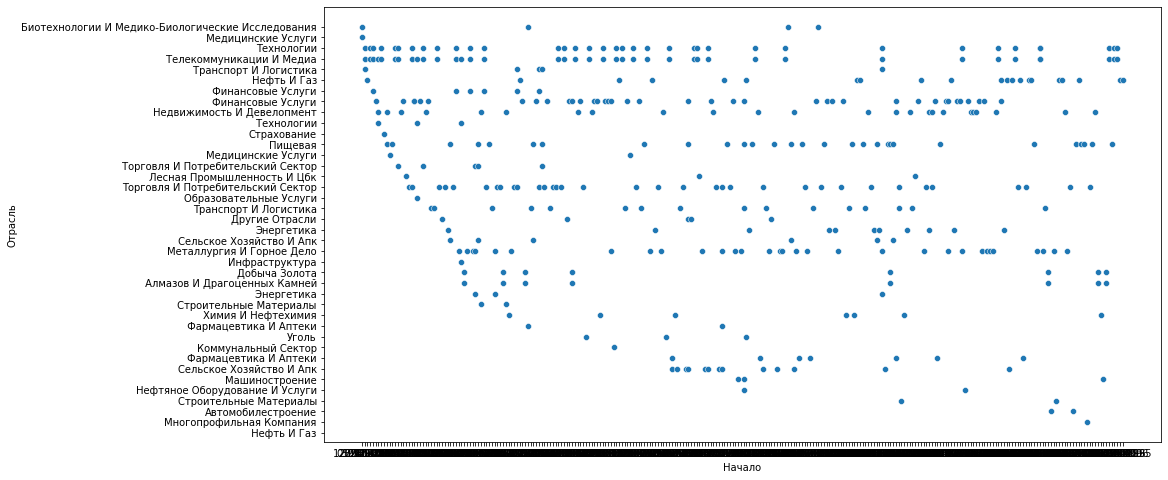

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
ax=sns.scatterplot(x='Начало', y='Отрасль', data=otr)

plt.show()

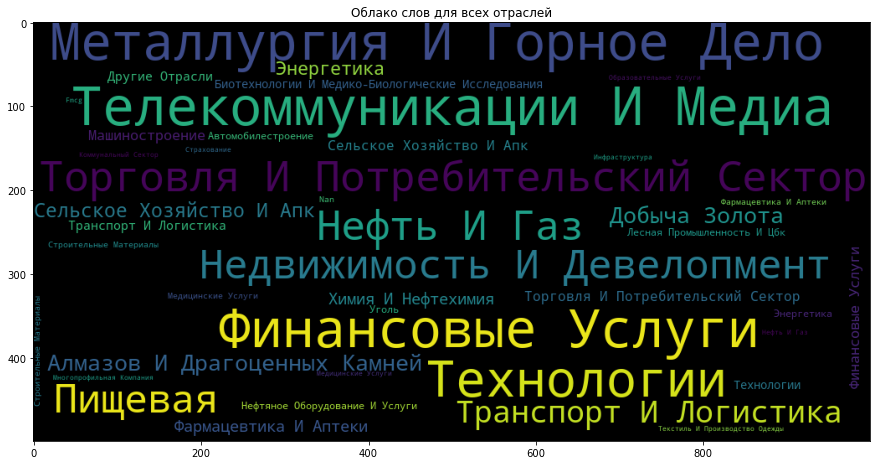

In [117]:
!pip install wordcloud


df_sum = otr['Отрасль'].value_counts().to_frame()
df_to_dict = dict(df_sum['Отрасль'])

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(df_to_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud);
plt.title('Облако слов для всех отраслей');


In [1]:
#Здесь мы делаем общий обзор отраслей, дальше мы создадим модель создающую усредненный портрет сделки по выходу на биржу в странах СНГ, насколько актуален будет двойной листинг, какой объем размещения имеет место быть и т.д.